<a href="https://colab.research.google.com/github/lcondoriz/TA047R-2C2024-GRUPO02/blob/main/TA047R_TP1_GRUPO02_ENTREGA_EJ1_N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#continuacion de la notebook 1 para resolver el punto e

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from datetime import time
import pyarrow.parquet as pq
from datetime import date
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from google.colab import drive
drive.mount('/content/drive')

taxis_abril=pd.read_csv('/content/drive/MyDrive/Ta047-tp_2do_cuat_2024_grupo_2/Data/EJ1/salida/taxis_amarillos_abril_limpio.csv')
taxis_mayo=pd.read_csv('/content/drive/MyDrive/Ta047-tp_2do_cuat_2024_grupo_2/Data/EJ1/salida/taxis_amarillos_mayo_limpio.csv')
taxis_junio=pd.read_csv('/content/drive/MyDrive/Ta047-tp_2do_cuat_2024_grupo_2/Data/EJ1/salida/taxis_amarillos_junio_limpio.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#miro la forma de una de las tablas

In [2]:
taxis_abril

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,congestion_surcharge,Airport_fee,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_hour_range,dropoff_hour_range,pickup_date_range,dropoff_date_range
0,0,1,2,4.90,1,0,48,223,1,28.9,...,2.5,0.00,2023-04-01,00:14:49,2023-04-01,00:45:01,0,0,1,1
1,1,2,1,21.89,2,0,132,43,2,70.0,...,2.5,1.25,2023-04-01,00:00:24,2023-04-01,00:56:19,0,0,1,1
2,2,1,2,1.30,1,0,148,113,1,11.4,...,2.5,0.00,2023-04-01,00:03:50,2023-04-01,00:14:42,0,0,1,1
3,3,1,1,1.50,1,0,249,79,1,10.0,...,2.5,0.00,2023-04-01,00:53:18,2023-04-01,01:01:28,0,1,1,1
4,4,2,2,1.49,1,0,158,246,1,11.4,...,2.5,0.00,2023-04-01,00:07:00,2023-04-01,00:17:16,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197555,3197555,1,3,9.70,1,0,138,151,1,40.8,...,0.0,1.75,2023-04-30,23:29:24,2023-04-30,23:54:57,23,23,30,30
3197556,3197556,2,1,1.32,1,0,158,246,1,8.6,...,2.5,0.00,2023-04-30,23:03:33,2023-04-30,23:09:26,23,23,30,30
3197557,3197557,2,1,1.23,1,0,48,246,1,7.9,...,2.5,0.00,2023-04-30,23:24:22,2023-04-30,23:29:17,23,23,30,30
3197558,3197558,2,1,2.68,1,0,48,79,1,14.2,...,2.5,0.00,2023-04-30,23:39:17,2023-04-30,23:50:25,23,23,30,30


#funcion para sacar el intervalo de dias

In [3]:
def unificadora(tabla):
  cadena1=tabla['pickup_date'] + ' ' + tabla['pickup_time']
  tabla['fecha_y_hora_inicio_viaje'] = pd.to_datetime(cadena1)
  cadena2=tabla['dropoff_date'] + ' ' + tabla['dropoff_time']
  tabla['fecha_y_hora_fin_viaje'] = pd.to_datetime(cadena2)

In [4]:
def separadora(tabla):
    tabla['duracion_dias'] = tabla['tiempo_de_viaje'].dt.days
    #tabla['tiempo'] = tabla['tiempo_de_viaje'].dt.time
    tabla['duracion_tiempo'] = tabla['tiempo_de_viaje'].dt.components['hours'].astype(str).str.zfill(2) + ':' + \
                      tabla['tiempo_de_viaje'].dt.components['minutes'].astype(str).str.zfill(2) + ':' + \
                      tabla['tiempo_de_viaje'].dt.components['seconds'].astype(str).str.zfill(2)
    tabla.drop(['pickup_date','pickup_time','dropoff_date','dropoff_time','tiempo_de_viaje'],axis= "columns",inplace=True)

In [5]:
unificadora(taxis_abril)
taxis_abril['tiempo_de_viaje'] = taxis_abril['fecha_y_hora_fin_viaje'] - taxis_abril['fecha_y_hora_inicio_viaje']
separadora(taxis_abril)
taxis_abril

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,congestion_surcharge,Airport_fee,pickup_hour_range,dropoff_hour_range,pickup_date_range,dropoff_date_range,fecha_y_hora_inicio_viaje,fecha_y_hora_fin_viaje,duracion_dias,duracion_tiempo
0,0,1,2,4.90,1,0,48,223,1,28.9,...,2.5,0.00,0,0,1,1,2023-04-01 00:14:49,2023-04-01 00:45:01,0,00:30:12
1,1,2,1,21.89,2,0,132,43,2,70.0,...,2.5,1.25,0,0,1,1,2023-04-01 00:00:24,2023-04-01 00:56:19,0,00:55:55
2,2,1,2,1.30,1,0,148,113,1,11.4,...,2.5,0.00,0,0,1,1,2023-04-01 00:03:50,2023-04-01 00:14:42,0,00:10:52
3,3,1,1,1.50,1,0,249,79,1,10.0,...,2.5,0.00,0,1,1,1,2023-04-01 00:53:18,2023-04-01 01:01:28,0,00:08:10
4,4,2,2,1.49,1,0,158,246,1,11.4,...,2.5,0.00,0,0,1,1,2023-04-01 00:07:00,2023-04-01 00:17:16,0,00:10:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197555,3197555,1,3,9.70,1,0,138,151,1,40.8,...,0.0,1.75,23,23,30,30,2023-04-30 23:29:24,2023-04-30 23:54:57,0,00:25:33
3197556,3197556,2,1,1.32,1,0,158,246,1,8.6,...,2.5,0.00,23,23,30,30,2023-04-30 23:03:33,2023-04-30 23:09:26,0,00:05:53
3197557,3197557,2,1,1.23,1,0,48,246,1,7.9,...,2.5,0.00,23,23,30,30,2023-04-30 23:24:22,2023-04-30 23:29:17,0,00:04:55
3197558,3197558,2,1,2.68,1,0,48,79,1,14.2,...,2.5,0.00,23,23,30,30,2023-04-30 23:39:17,2023-04-30 23:50:25,0,00:11:08


In [6]:
unificadora(taxis_mayo)
taxis_mayo['tiempo_de_viaje'] = taxis_mayo['fecha_y_hora_fin_viaje'] - taxis_mayo['fecha_y_hora_inicio_viaje']
separadora(taxis_mayo)
taxis_mayo

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,congestion_surcharge,Airport_fee,pickup_hour_range,dropoff_hour_range,pickup_date_range,dropoff_date_range,fecha_y_hora_inicio_viaje,fecha_y_hora_fin_viaje,duracion_dias,duracion_tiempo
0,0,1,1,7.80,1,0,138,43,1,33.8,...,0.0,1.75,0,0,1,1,2023-05-01 00:33:13,2023-05-01 00:53:01,0,00:19:48
1,1,1,2,8.10,1,0,138,262,1,35.9,...,2.5,1.75,0,1,1,1,2023-05-01 00:42:49,2023-05-01 01:11:18,0,00:28:29
2,2,1,2,9.10,1,0,138,141,1,35.2,...,2.5,1.75,0,1,1,1,2023-05-01 00:56:34,2023-05-01 01:13:39,0,00:17:05
3,3,2,1,8.21,1,0,138,140,1,33.1,...,2.5,1.75,0,0,1,1,2023-05-01 00:00:52,2023-05-01 00:20:12,0,00:19:20
4,4,1,1,7.90,1,0,138,263,1,31.0,...,2.5,1.75,0,0,1,1,2023-05-01 00:05:50,2023-05-01 00:19:41,0,00:13:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411848,3411848,2,2,3.29,1,0,239,74,1,19.8,...,2.5,0.00,23,23,31,31,2023-05-31 23:39:27,2023-05-31 23:56:59,0,00:17:32
3411849,3411849,2,1,1.81,1,0,79,234,1,12.1,...,2.5,0.00,23,23,31,31,2023-05-31 23:15:28,2023-05-31 23:24:48,0,00:09:20
3411850,3411850,2,1,6.91,1,0,186,223,1,36.6,...,2.5,0.00,23,0,31,1,2023-05-31 23:27:31,2023-06-01 00:03:00,0,00:35:29
3411851,3411851,1,1,2.50,1,0,170,114,1,13.5,...,2.5,0.00,23,23,31,31,2023-05-31 23:42:24,2023-05-31 23:53:28,0,00:11:04


In [7]:
unificadora(taxis_junio)
taxis_junio['tiempo_de_viaje'] = taxis_junio['fecha_y_hora_fin_viaje'] - taxis_junio['fecha_y_hora_inicio_viaje']
separadora(taxis_junio)
taxis_junio

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,congestion_surcharge,Airport_fee,pickup_hour_range,dropoff_hour_range,pickup_date_range,dropoff_date_range,fecha_y_hora_inicio_viaje,fecha_y_hora_fin_viaje,duracion_dias,duracion_tiempo
0,0,1,1,3.40,1,0,140,238,1,21.9,...,2.5,0.00,0,0,1,1,2023-06-01 00:08:48,2023-06-01 00:29:41,0,00:20:53
1,1,1,1,3.40,1,0,50,151,1,15.6,...,2.5,0.00,0,0,1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0,00:10:14
2,2,1,1,10.20,1,0,138,97,1,40.8,...,0.0,1.75,0,1,1,1,2023-06-01 00:48:24,2023-06-01 01:07:07,0,00:18:43
3,3,2,3,9.83,1,0,100,244,1,39.4,...,2.5,0.00,0,1,1,1,2023-06-01 00:54:03,2023-06-01 01:17:29,0,00:23:26
4,4,2,1,1.17,1,0,137,234,1,9.3,...,2.5,0.00,0,0,1,1,2023-06-01 00:18:44,2023-06-01 00:27:18,0,00:08:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207342,3207342,2,2,1.58,1,0,230,162,1,12.8,...,2.5,0.00,23,23,30,30,2023-06-30 23:37:53,2023-06-30 23:51:14,0,00:13:21
3207343,3207343,2,2,1.47,1,0,162,48,2,12.8,...,2.5,0.00,23,0,30,1,2023-06-30 23:54:47,2023-07-01 00:07:19,0,00:12:32
3207344,3207344,1,1,3.30,1,0,249,143,1,17.7,...,2.5,0.00,23,0,30,1,2023-06-30 23:47:32,2023-07-01 00:06:45,0,00:19:13
3207345,3207345,2,1,10.59,1,0,132,39,1,42.9,...,0.0,1.75,23,23,30,30,2023-06-30 23:04:54,2023-06-30 23:30:59,0,00:26:05


#calculo dia de la semana en que se realizo el viaje

In [8]:
def calcular_dia_semana(fecha):
    dia_semana = fecha.weekday()
    dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    return dias_semana[dia_semana]

# Aplicar la función a la columna 'fecha' y crear una nueva columna 'dia_semana'
# Removed .flatten() as it is not needed for Series
taxis_abril['dia_semana'] = taxis_abril['fecha_y_hora_inicio_viaje'].apply(calcular_dia_semana)
taxis_mayo['dia_semana'] = taxis_mayo['fecha_y_hora_inicio_viaje'].apply(calcular_dia_semana)
taxis_junio['dia_semana'] = taxis_junio['fecha_y_hora_inicio_viaje'].apply(calcular_dia_semana)

#ahora hago el cruce de las variables
agrupo por dia de la semana

In [9]:
taxis_abril_agrupado=taxis_abril.groupby('dia_semana')


#¿Cómo son los viajes típicamente en distancia y tiempo según el horario y/o el día de la semana?

<ipython-input-13-a71c4a06774e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_1 = sns.violinplot(x="dia_semana", y="trip_distance", data=taxis_abril, palette=["r","g"]).set(title="grafico de violin de dia de la semana vs trip_distance")
<ipython-input-13-a71c4a06774e>:1: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  grafico_1 = sns.violinplot(x="dia_semana", y="trip_distance", data=taxis_abril, palette=["r","g"]).set(title="grafico de violin de dia de la semana vs trip_distance")


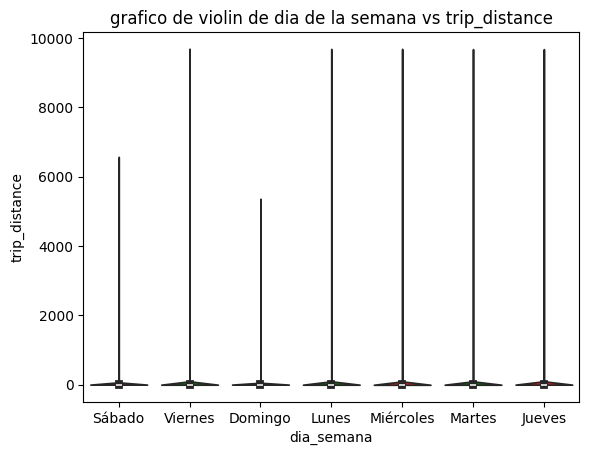

In [13]:
grafico_1 = sns.violinplot(x="dia_semana", y="trip_distance", data=taxis_abril, palette=["r","g"]).set(title="grafico de violin de dia de la semana vs trip_distance")

#¿Existe una manera de caracterizar los lugares más recurrentes para inicio/fin de viaje?

<ipython-input-11-245a353d1fa0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_2 = sns.violinplot(x="PULocationID", y="trip_distance", data=taxis_abril_agrupado_por_inicio, palette=["r","g"]).set(title="grafico de violin de PULocationID vs trip_distance")
<ipython-input-11-245a353d1fa0>:6: UserWarning: 
The palette list has fewer values (2) than needed (258) and will cycle, which may produce an uninterpretable plot.
  grafico_2 = sns.violinplot(x="PULocationID", y="trip_distance", data=taxis_abril_agrupado_por_inicio, palette=["r","g"]).set(title="grafico de violin de PULocationID vs trip_distance")


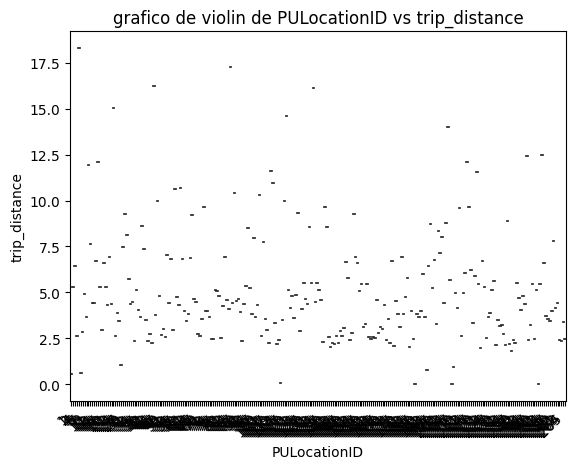

In [11]:
taxis_abril_agrupado_por_inicio = taxis_abril.groupby('PULocationID')['trip_distance'].mean().reset_index()

# If you intend to plot all data points within each group, reset_index directly on original grouped DataFrame
#taxis_abril_agrupado_por_inicio = taxis_abril.groupby('PULocationID').reset_index()

grafico_2 = sns.violinplot(x="PULocationID", y="trip_distance", data=taxis_abril_agrupado_por_inicio, palette=["r","g"]).set(title="grafico de violin de PULocationID vs trip_distance")
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right') # Rotate 45 degrees and align right

plt.show() # Show the plot with rotated labels

# ¿Cómo son los viajes típicamente en distancia (trip_Distance) y tiempo (tpep_pickup_datetime- tpep_dropoff_datetime)?  

lo resuelvo haciendo el cruce de trip_distance con duracion, para eso discretizo

In [16]:
def categorize_duration(duration):
        h, m, s = map(int, duration.split(':'))
        total_minutes = h * 60 + m
        if total_minutes < 30:
            #return "Short Trip"
            return 1
        elif total_minutes < 60:
            #return "Medium Trip"
            return 2
        else:
            #return "Long Trip"
            return 3

In [17]:
taxis_abril['duration_category'] = taxis_abril['duracion_tiempo'].apply(categorize_duration)
    #taxis_mayo['duration_category'] = taxis_mayo['duracion_tiempo'].apply(categorize_duration)
    #taxis_junio['duration_category'] = taxis_junio['duracion_tiempo'].apply(categorize_duration)

<ipython-input-18-2185f4481f03>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_3 = sns.violinplot(x="duration_category", y="trip_distance", data=taxis_abril, palette=["r","g"]).set(title="grafico de violin de categoria de duracion del viaje vs trip_distance")
<ipython-input-18-2185f4481f03>:1: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  grafico_3 = sns.violinplot(x="duration_category", y="trip_distance", data=taxis_abril, palette=["r","g"]).set(title="grafico de violin de categoria de duracion del viaje vs trip_distance")


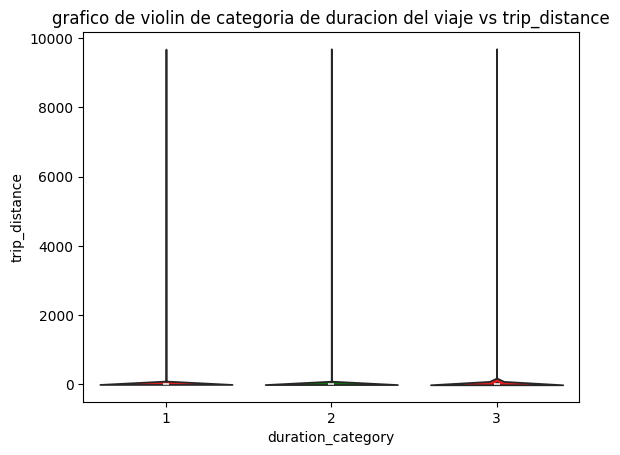

In [18]:
grafico_3 = sns.violinplot(x="duration_category", y="trip_distance", data=taxis_abril, palette=["r","g"]).set(title="grafico de violin de categoria de duracion del viaje vs trip_distance")